In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split

from scipy.cluster.hierarchy import dendrogram

import collections

import warnings
warnings.filterwarnings('ignore')

In [2]:
def show_decision_region(x, y, clf, f0, f1, centroids=None):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    plt.title(clf.__class__.__name__)

    if centroids is not None:
        plt.scatter(
            centroids[:, 0],
            centroids[:, 1], 
            c="tab:red", 
            marker="*",
            s=300,
            alpha=1
        )
    plt.show()


In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1/main/Iris.csv')
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

In [5]:
feature_0 = "PetalLengthCm"
feature_1 = "PetalWidthCm"

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

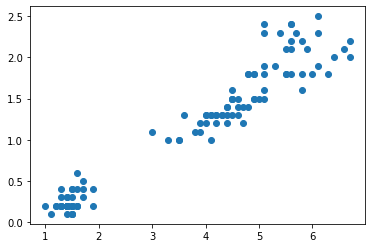

In [7]:
plt.scatter(
    X_train[feature_0],
    X_train[feature_1], 
)

# **KMeans**

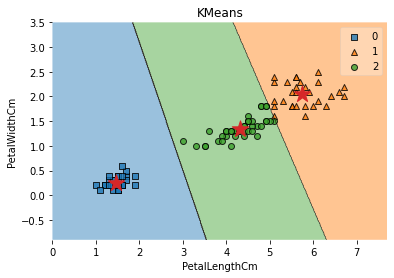

In [8]:
model = KMeans(n_clusters=3, random_state=199)
model.fit(X_train, y_train)
labels = model.predict(X_train)

# cores e simbolos para as classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen", 3: "pink"}
markers = {0: "s", 1: "^", 2:"o", 3:"h"}

show_decision_region(
    np.array(
        [
            X_train[feature_0].values, 
            X_train[feature_1].values,
        ]
    ).T, 
    labels, 
    model, 
    feature_0, 
    feature_1,
    model.cluster_centers_
)

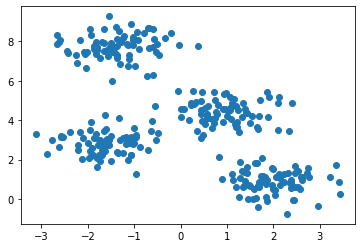

In [9]:
from sklearn.datasets import make_moons, make_circles, make_blobs

# criação do dataset
X, y = make_blobs(300, 2, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

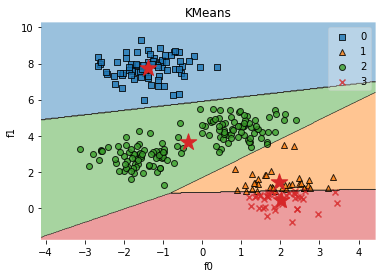

In [10]:
model = KMeans(n_clusters=4, init="random", n_init=1, random_state=0)
model.fit(X)

show_decision_region(
    X,
    model.predict(X),
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

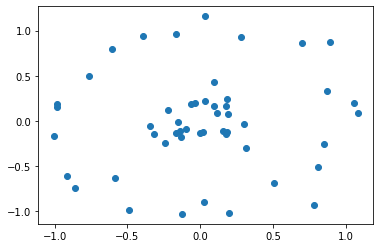

In [11]:
from sklearn.datasets import make_moons, make_circles, make_blobs

# criação do dataset
X, y = make_circles(n_samples=50, noise=0.1, random_state=199, factor=0.2)
plt.scatter(X[:, 0], X[:, 1])

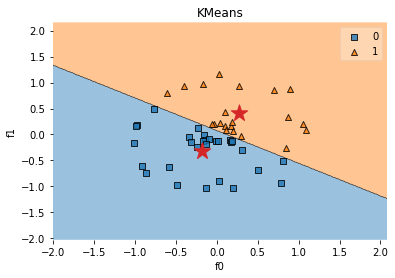

In [12]:
# cores e simbolos para as classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

model = KMeans(n_clusters=2)
model.fit(X)

show_decision_region(
    X,
    model.predict(X),
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

# **Agrupamento Hierárquico**

In [13]:
dataset = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1/main/Iris.csv')
dataset

X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

In [14]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(X, y)
labels = model.labels_

In [15]:
collections.Counter(labels)

Counter({1: 50, 2: 46, 0: 54})

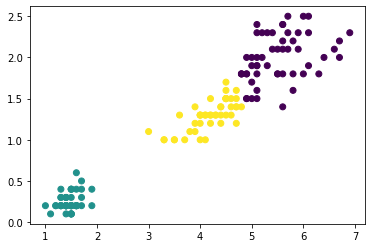

In [16]:
plt.scatter(X[feature_0], X[feature_1], c=labels)
plt.show()

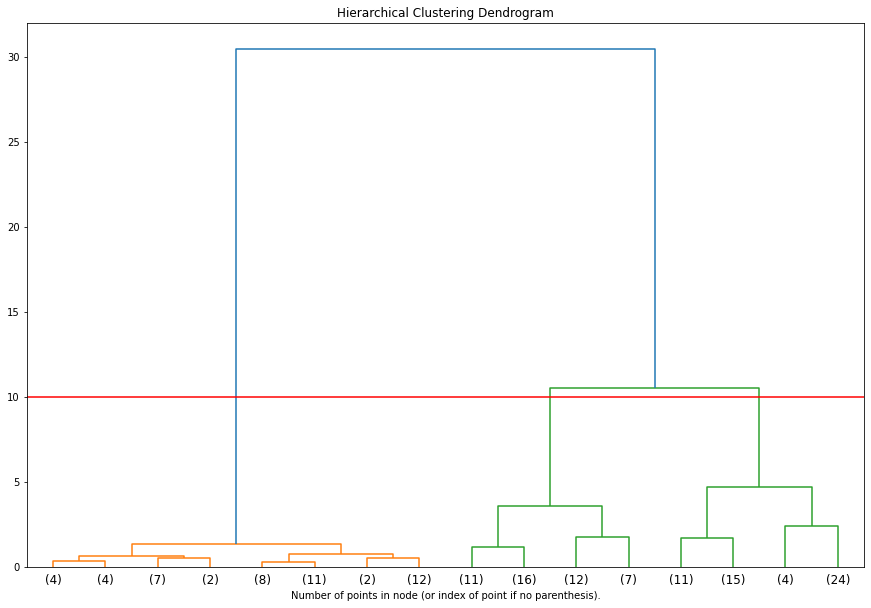

In [17]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_full_tree=True)
model = model.fit(X)
plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y=10, color='red')
plt.show()